1. Data Processing 

In [1]:
import pandas as pd
import numpy as np

In [7]:
#housing=pd.read_csv("Long_CT_Crimes.csv")
housing=pd.read_csv("Long_CT_Crimes.csv")
airbnb=pd.read_csv("Airbnb_CT_Crimes.csv")
airbnb=airbnb.dropna()
housing=housing.dropna()

1.1 HOUSING

In [10]:
housing=housing.drop(housing.columns[[0,2]],axis=1)
price=housing.set_index('CT').groupby('CT')['AV_BLDG'].median()
crime=housing.set_index('CT').groupby("CT").sum()
crime=crime.drop(crime.columns[[0]],axis=1)
housing=pd.concat([price,crime],axis=1).reset_index()
housing.to_csv("CT_housing.csv",encoding='utf-8')

1.2 AIRBNB

In [12]:
crime=airbnb.iloc[:,36:61]
price=airbnb.iloc[:,7]
CT=airbnb.iloc[:,14]
airbnb=pd.concat([CT,price,crime],axis=1)
price1=airbnb.set_index(["TRACTCE10"]).groupby("TRACTCE10")[["price"]].median().reset_index().drop(["TRACTCE10"],axis=1)
crime1=airbnb.set_index(["TRACTCE10"]).groupby("TRACTCE10").sum().reset_index().drop(["price","TRACTCE10"],axis=1)
CT_airbnb=pd.concat([price1,crime1],axis=1)
CT_airbnb.to_csv("CT_airbnb.csv",encoding='utf-8')

Crimes,Airbnb and Housing Visulization

In [278]:
#--------------explore data visualization---------------------

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns


#sns.set_style("whitegrid")
CT_airbnb=pd.read_csv('CT_airbnb.csv')
CT_housing=pd.read_csv('CT_housing.csv')
CT_housing=CT_housing.rename(columns={'AV_BLDG': 'price'})

In [279]:
CT_airbnb=CT_airbnb.drop(["Sum_Mansla"],axis=1) #Drop NAN columns
air_crime=CT_airbnb[['price','Sum_Commer','Sum_Firear','Sum_Search','Sum_Simple','Sum_Vandal']]
hou_crime=CT_housing[['price','Sum_Assemb','Sum_Bomb_H','Sum_Commer','Sum_Disord','Sum_Drug_V','Sum_Homici','Sum_Offens','Sum_Vandal']]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

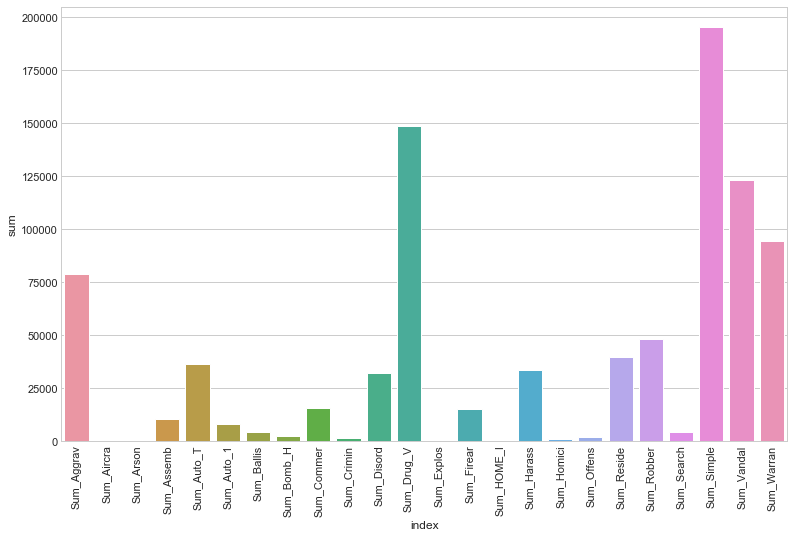

In [263]:
#Crime frequency
crime=CT_airbnb.sum()[2:27].rename('sum').reset_index()
#without selected
fig, ax = plt.subplots()
fig.set_size_inches(13,8)
sns.set(style="whitegrid")
ax = sns.barplot(x="index", y="sum", data=crime)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

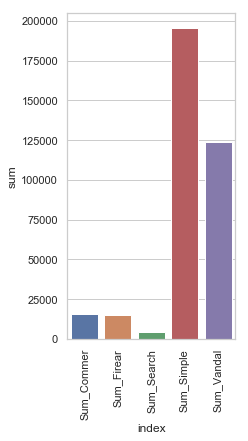

In [267]:
#Airbnb model selected crimes
crime_sel=air_crime.sum()[1:].rename('sum').reset_index()
fig, ax = plt.subplots()
fig.set_size_inches(3,6)
sns.set(style="whitegrid")
ax = sns.barplot(x="index", y="sum", data=crime_sel)#with selected
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

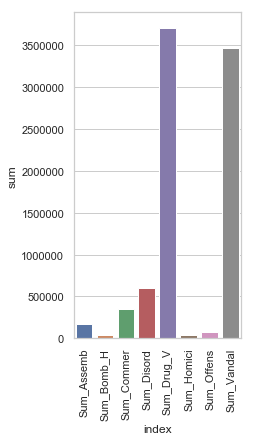

In [264]:
#Housing model selected crimes
hou_crime_sel=hou_crime.sum()[1:].rename('sum').reset_index()
fig, ax = plt.subplots()
fig.set_size_inches(3,6)
sns.set(style="whitegrid")
ax = sns.barplot(x="index", y="sum", data=hou_crime_sel)#without selected
plt.xticks(rotation=90)

In [223]:
#Airbnb data Summary statistics
air_crime.describe().round(2) 

,price,Sum_Commer,Sum_Firear,Sum_Search,Sum_Simple,Sum_Vandal
count,174.00,174.00,174.00,174.00,174.00,174.00
mean,126.59,90.71,88.00,24.84,1122.41,709.80
std,76.05,497.76,506.34,52.66,5094.07,2032.95
min,35.00,0.00,0.00,0.00,0.00,4.00
25%,76.12,0.00,0.00,0.00,100.50,100.00
50%,105.00,10.00,20.00,0.00,288.00,322.00
75%,162.62,42.00,70.00,29.50,896.00,738.50
max,628.00,6412.00,6641.00,392.00,65494.00,25648.00


In [224]:
#Housing data Summary statistics
hou_crime.describe().round(2)

,price,Sum_Assemb,Sum_Bomb_H,Sum_Commer,Sum_Disord,Sum_Drug_V,Sum_Homici,Sum_Offens,Sum_Vandal
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,529028.63,969.22,250.69,2023.04,3483.39,21535.67,261.09,429.66,20117.05
std,944009.59,5098.34,1806.26,7560.54,16850.69,74795.47,727.37,675.84,33215.13
min,169600.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,247512.50,0.00,0.00,0.00,32.75,2049.00,0.00,0.00,4896.00
50%,327650.00,0.00,0.00,553.50,1071.00,7614.50,0.00,0.00,12943.50
75%,469425.00,647.50,0.00,1683.00,2217.00,15186.25,0.00,681.25,24376.25
max,9373200.00,63232.00,23296.00,93184.00,216320.00,908544.00,4660.00,3339.00,372736.00


In [141]:
def cleaning(dataset,col):
        a=dataset[col][dataset[col]==0].index.tolist()
        dataset_clean=dataset[col].drop(a).dropna()#drop NAN and 0 value 
        b=dataset[col].sort_values()[-5:].index.tolist()#Remove top five highest value to omit outliers
        dataset_cl=dataset_clean.drop(b)
        return(dataset_cl)

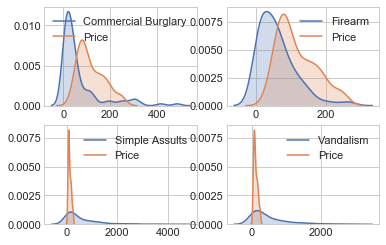

In [222]:
#Airbnb density
a=cleaning(air_crime,'Sum_Commer').rename('Commercial Burglary')
b=cleaning(air_crime,'price').rename('Price')
c=cleaning(air_crime,'Sum_Firear').rename('Firearm')
d=cleaning(air_crime,'Sum_Simple').rename('Simple Assults')
e=cleaning(air_crime,'Sum_Vandal').rename('Vandalism')
f=cleaning(air_crime,'Sum_Search').rename('Search Warrants')

plt.subplot(221)
sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.subplot(222)
sns.kdeplot(c, shade=True)
sns.kdeplot(b, shade=True)
plt.subplot(223)
sns.kdeplot(d, shade=True)
sns.kdeplot(b, shade=True)
plt.subplot(224)
sns.kdeplot(e, shade=True)
sns.kdeplot(b, shade=True)

In [277]:
hou=pd.concat([b,a,c,d,e,f],axis=1)
hou=hou.dropna(axis=0,how='any')
hou

,Price,Commer,Bomb,Assemb,Vandal,Offens
75,468200.0,1406.0,703.0,703.0,24605.0,703.0
95,240000.0,2945.0,589.0,589.0,38285.0,1178.0
112,258600.0,2211.0,737.0,737.0,44220.0,1474.0


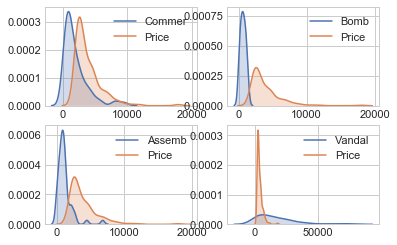

In [225]:
#Housing data density
a=cleaning(hou_crime,'Sum_Commer').rename('Commer')
b=cleaning(hou_crime,'price').rename('Price')
c=cleaning(hou_crime,'Sum_Bomb_H').rename('Bomb')
d=cleaning(hou_crime,'Sum_Assemb').rename('Assemb')
e=cleaning(hou_crime,'Sum_Vandal').rename('Vandal')
f=cleaning(hou_crime,'Sum_Offens').rename('Offens')
g=cleaning(hou_crime,'Sum_Homici').rename('Homici')#
h=cleaning(hou_crime,'Sum_Disord').rename('Disord')
i=cleaning(hou_crime,'Sum_Drug_V').rename('Drug')


plt.subplot(221)
sns.kdeplot(a, shade=True)
sns.kdeplot(b/100, shade=True)
plt.subplot(222)
sns.kdeplot(c, shade=True)
sns.kdeplot(b/100, shade=True)
plt.subplot(223)
sns.kdeplot(d, shade=True)
sns.kdeplot(b/100, shade=True)
plt.subplot(224)
sns.kdeplot(e, shade=True)
sns.kdeplot(b/100, shade=True)#divided 100 to ensure two dataset in the same scale for better visualization

In [227]:
def half_masked_corr_heatmap(dataframe,title=None,file=None):
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)
    
    mask=np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)]=True
    
    with sns.axes_style("white"):
        sns.heatmap(dataframe.corr(),mask=mask,annot=True,cmap="coolwarm")
        
    if title:plt.title(f'\n{title}\n',fontsize=18)
    plt.xlabel('')
    plt.ylabel('')
    if file:plt.savefig(file,bbox_inches='tight')
    plt.show();
        
    return

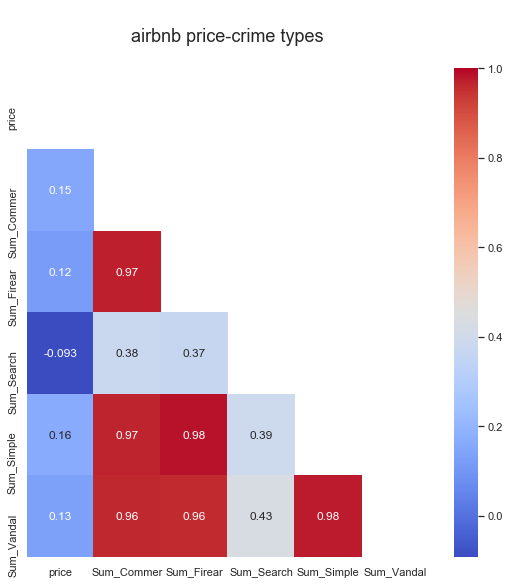

In [228]:
half_masked_corr_heatmap(air_crime,'airbnb price-crime types',) 

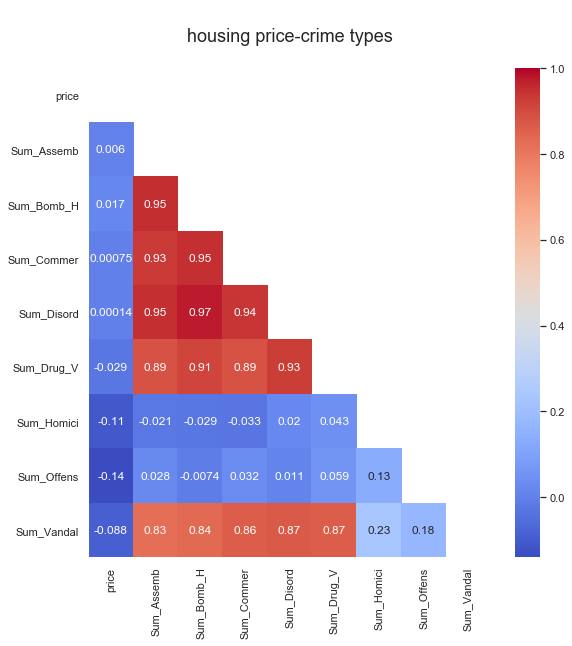

In [229]:
half_masked_corr_heatmap(hou_crime,'housing price-crime types',)   

In [280]:
# Use z-score normalize data
from sklearn.preprocessing import StandardScaler
#Airbnb data normalize
ss = StandardScaler()
scale_features = ['price','Sum_Commer','Sum_Firear','Sum_Search','Sum_Simple','Sum_Vandal']
CT_airbnb[scale_features] = ss.fit_transform(CT_airbnb[scale_features])

#Housing data normalize
ss1 = StandardScaler()
scale_features1 = ['price','Sum_Assemb','Sum_Bomb_H','Sum_Commer','Sum_Disord','Sum_Drug_V','Sum_Homici','Sum_Offens','Sum_Vandal']
CT_housing[scale_features1] = ss.fit_transform(CT_housing[scale_features1])

In [281]:
air_crime=CT_airbnb[['price','Sum_Commer','Sum_Firear','Sum_Search','Sum_Simple','Sum_Vandal']]
hou_crime=CT_housing[['price','Sum_Assemb','Sum_Bomb_H','Sum_Commer','Sum_Disord','Sum_Drug_V','Sum_Homici','Sum_Offens','Sum_Vandal']]

In [237]:
# Important Variables scatter plot
import math
def gen_scatterplots(dataframe,target_column,list_of_columns,cols=1,file=None):
    rows=math.ceil(len(list_of_columns)/cols)
    figwidth=5*cols
    figheight=4*rows
    
    fig, ax=plt.subplots(nrows=rows,
                      ncols=cols,
                      figsize=(figwidth,figheight))
    color_choices=['blue','grey','goldenrod','r','black','darkorange','g']
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    ax=ax.ravel()
    
    for i, column in enumerate(list_of_columns):
        ax[i].scatter(dataframe[column],
                     dataframe[target_column],
                     color=color_choices[i%len(color_choices)],
                     alpha=0.1)
        ax[i].set_ylabel(f'{target_column}',fontsize=14)
        ax[i].set_xlabel(f'{column}',fontsize=14)
        
    fig.suptitle('Important Feature VS Airbnb Price',size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0,top=0.88)
    if file:plt.savefig(file, bbox_inches='tight')
    plt.show();
    return    

In [268]:
#Histograms plot
def gen_histograms(dataframe,cols=1,file=None):
    rows=math.ceil(len(dataframe.columns)/cols)
    figwidth=5*cols
    figheight=4*rows
    
    fig, ax=plt.subplots(nrows=rows,
                      ncols=cols,
                      figsize=(figwidth,figheight))
    color_choices=['blue','grey','goldenrod','r','black','darkorange','g']
    ax=ax.ravel()
    
    for i, column in enumerate((dataframe.columns)):
        ax[i].hist(dataframe[column][dataframe[column]!=0],
                     color=color_choices[i%len(color_choices)],
                     alpha=1)
        ax[i].set_title(f'{dataframe[column].name}',fontsize=18)
        ax[i].set_ylabel('Observation',fontsize=14)
        ax[i].set_xlabel('',fontsize=14)
        
    fig.suptitle('Important Feature',size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0,top=0.88)
    if file:plt.savefig(file, bbox_inches='tight')
    plt.show();
    return   

In [282]:
#Normalized data clean

for col in air_crime.columns:
    air_crime[col]=cleaning(air_crime,col)
    
for col1 in hou_crime.columns:
    hou_crime[col1]=cleaning(hou_crime,col1)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


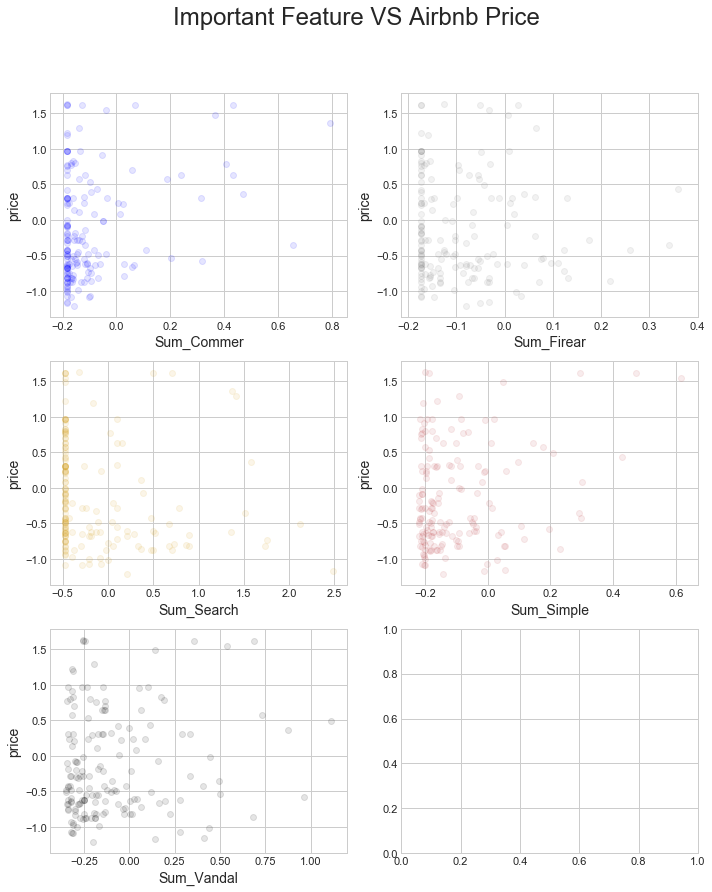

In [248]:
feature_col=[col for col in air_crime.columns if col!='price']
gen_scatterplots(air_crime,'price',feature_col,cols=2,file=None)

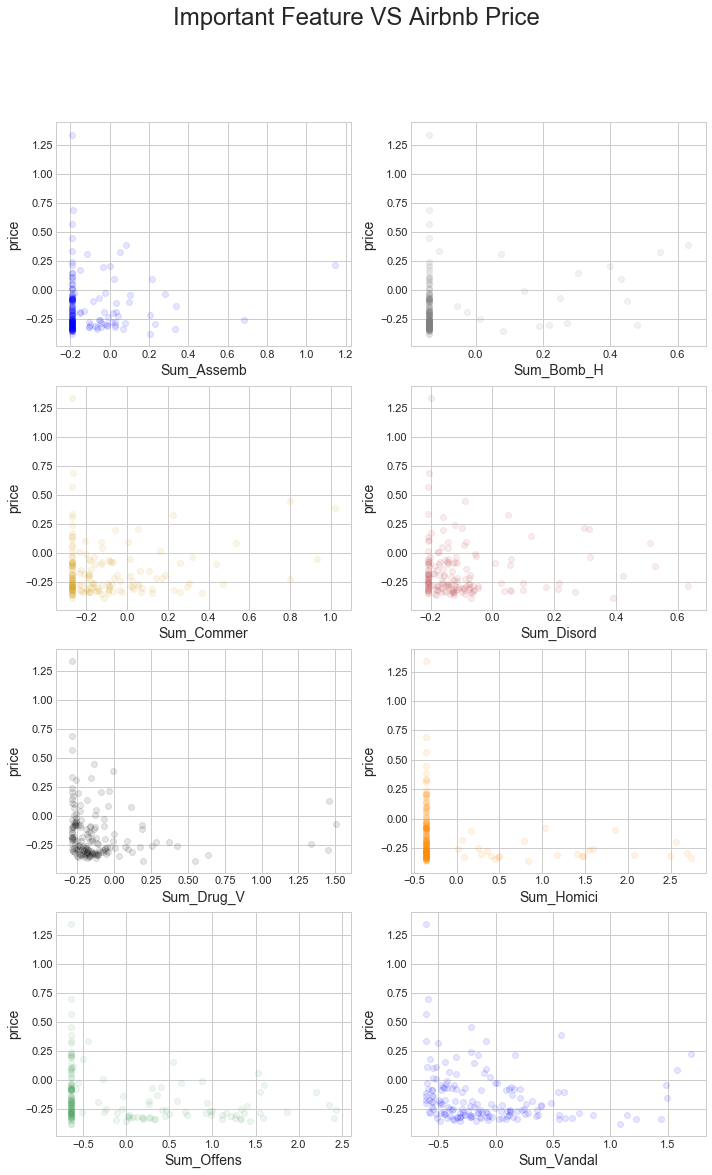

In [249]:
feature_col=[col for col in hou_crime.columns if col!='price']
gen_scatterplots(hou_crime,'price',feature_col,cols=2,file=None)

In [180]:
#Output normalized airbnb data
air_crime=air_crime.dropna(axis=0,how='any')
air_crime.to_csv('air_z_score.csv')

hou_crime=hou_crime.dropna(axis=0,how='any')
hou_crime.to_csv('hou_z_score.csv')